In [1]:
# importing modules
import pandas as pd
import numpy as np
import statsmodels.api as st
import seaborn as sns
import matplotlib.pylab as plt
import sklearn as sk
plt.style.use('ggplot')

In [2]:
# importing Food security data
# let FS stand for Food security
FS_data=pd.read_csv('DataFS.csv')


In [3]:
#viewing the first five rows of the data
FS_data.head()

,ID,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,766,viwandani,primary,18.0,female,Other,6,1,yes,middle,fourth,0,Secure
1,6540,viwandani,primary,31.0,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,9327,viwandani,primary,45.0,male,Other,1,0,no_(2),highest,fourth,0,Secure
3,9563,viwandani,secondary,18.0,male,Other,1,0,no_(2),middle,second,1,Moderately insecure
4,9631,korogocho,secondary,58.0,male,Other,2,1,no_(2),highest,fourth,0,Secure


In [4]:
# checking the number of rows and columns in the data
FS_data.shape

(10991, 13)

In [5]:
# there are 10991 rows and 13 columns

In [6]:
# checking all the data types
FS_data.dtypes

ID            int64
site         object
hhedu        object
hhhage      float64
hhhsex       object
hhethnic     object
hhsize        int64
u05           int64
povline      object
windex3      object
windex5      object
FS_score      int64
FS           object
dtype: object


# cleaning the data

In [7]:
# checking for missing values
FS_data.isnull().mean().round(4)*100

ID          0.00
site        0.00
hhedu       0.15
hhhage      0.05
hhhsex      0.00
hhethnic    0.05
hhsize      0.00
u05         0.00
povline     0.05
windex3     0.00
windex5     0.00
FS_score    0.00
FS          0.04
dtype: float64

In [8]:
# using a 15% threshold , I am dropping all missing values since missing values(x) is less or equal to 15%
FS_data=FS_data.dropna(axis=0,how='any')

In [9]:
# rechecking if all missing values has been droped
FS_data.isnull().mean().round(4)*100

ID          0.0
site        0.0
hhedu       0.0
hhhage      0.0
hhhsex      0.0
hhethnic    0.0
hhsize      0.0
u05         0.0
povline     0.0
windex3     0.0
windex5     0.0
FS_score    0.0
FS          0.0
dtype: float64

In [10]:
# Validating the data by changing household head age datatype from float to integers
import warnings 
warnings.filterwarnings('ignore')
FS_data['hhhage']=FS_data['hhhage'].astype('int64')

In [11]:
#rechecking the datatype of household head age
FS_data['hhhage'].dtype

dtype('int64')

In [12]:
# replacing no_(2) in the column poverty line with no
FS_data['povline']=FS_data['povline'].replace({'no_(2)':'no'})


In [13]:
# rechecking to see if wrong input(no_(2)) in the povline column has been replaced
FS_data.head()

,ID,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,766,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0,Secure
1,6540,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,9327,viwandani,primary,45,male,Other,1,0,no,highest,fourth,0,Secure
3,9563,viwandani,secondary,18,male,Other,1,0,no,middle,second,1,Moderately insecure
4,9631,korogocho,secondary,58,male,Other,2,1,no,highest,fourth,0,Secure


In [14]:
# the column ID is not relevant to the problem, dropping ID
FS_data_new=FS_data.drop('ID',axis=1)

In [15]:
FS_data_new.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0,Secure
1,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,viwandani,primary,45,male,Other,1,0,no,highest,fourth,0,Secure
3,viwandani,secondary,18,male,Other,1,0,no,middle,second,1,Moderately insecure
4,korogocho,secondary,58,male,Other,2,1,no,highest,fourth,0,Secure


# Exploratory Analysis

In [16]:
# finding the number of female household heads and the number of male household heads 
HS= FS_data_new['hhhsex'].value_counts()
HS

male      8312
female    2644
Name: hhhsex, dtype: int64

Text(0.5, 1.0, 'Proportion of male to female household heads')

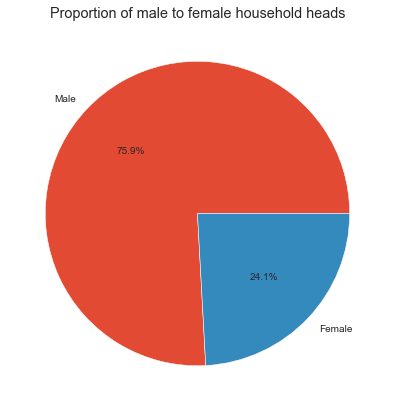

In [17]:
# creating a list with the result gotten
HHhcount=[8312,2644]
LABELS =['Male','Female']

# a pie chart to illustrate the proportion of male to female householdheads
sns.set_style('whitegrid')
plt.figure(figsize=(7,7))
plt.pie(HHhcount,labels=LABELS,autopct='%1.1f%%')
plt.title('Proportion of male to female household heads')


In [66]:
# changing all object datatypes to Category datatypes
convertdtypes={k:'category'for k in FS_data_new.select_dtypes(include='object').columns}


In [19]:
#checking if all object data types are now in category datatypes

In [67]:
convertdtypes

{'site': 'category',
 'hhedu': 'category',
 'hhhsex': 'category',
 'hhethnic': 'category',
 'povline': 'category',
 'windex3': 'category',
 'windex5': 'category',
 'FS': 'category'}

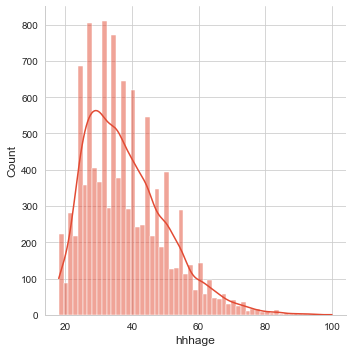

In [21]:
# Checking the distribution for the ages of house hold heads

sns.displot(FS_data_new['hhhage'],kde=True)



In [22]:
# this implies most of the house hold heads are within the working age group. few are above age 60
# Most of them are more active and young

In [23]:
# checking the relationship between education and food security

In [24]:
relationship=pd.crosstab(FS_data_new['hhedu'],FS_data_new['FS'],normalize='all')
relationship

FS,Moderately insecure,Secure,Severely insecure
hhedu,,,
highest,0.013052,0.017981,0.005568
never attended,0.016429,0.019259,0.019168
primary,0.161190,0.176798,0.100402
secondary,0.165663,0.216320,0.088171


<AxesSubplot:xlabel='FS', ylabel='hhedu'>

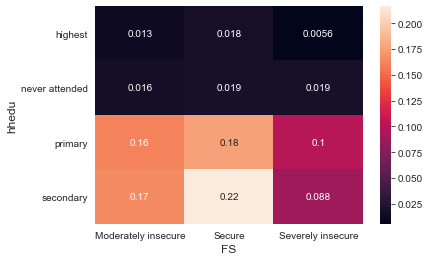

In [25]:
sns.heatmap(relationship,annot=True)

In [26]:
# it is interesting see that individuals whose highest education level was secondary had 22% Food security
# those with secondary and primary have a high food security

<AxesSubplot:xlabel='FS', ylabel='count'>

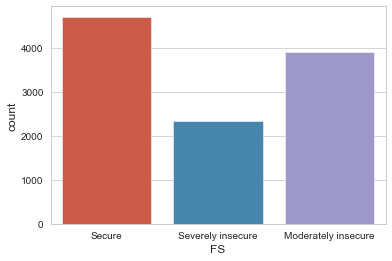

In [27]:
# The ditribution of individuals with access to health and quality food

sns.countplot(FS_data_new['FS'])

In [28]:
FS_DIST=FS_data_new['FS'].value_counts(1).reset_index()
pd.DataFrame(FS_DIST)

,index,FS
0,Secure,0.430358
1,Moderately insecure,0.356334
2,Severely insecure,0.213308


In [29]:
# about 43% percent of the households living in the four neighborhoods had access to quality and healthy food.

In [31]:
FS_data_new['povline'].value_counts(1)

no     0.581599
yes    0.418401
Name: povline, dtype: float64

In [ ]:
# this implies that approximately 42% of the households were leaving in poverty and their income did not meet their basic needs.

In [38]:
# finding out if Education had a big influence on household wealth tertile
pd.crosstab(FS_data_new['hhedu'],FS_data_new['windex3'])

windex3,highest,lowest,middle
hhedu,,,
highest,191,70,140
never attended,220,194,187
primary,1882,1364,1557
secondary,2358,1150,1643


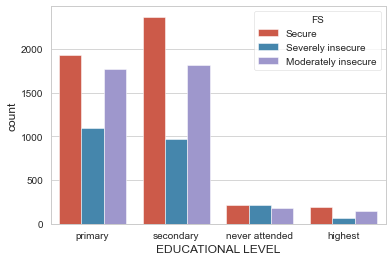

In [43]:
axes=sns.countplot(data=FS_data_new, x='hhedu',hue='FS')
axes.set_xlabel('EDUCATIONAL LEVEL')

plt.show()

# STATISTICS

In [68]:
# decribing the data
FS_data_new.describe(exclude='category')

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
count,10956,10956,10956.000000,10956,10956,10956.000000,10956.000000,10956,10956,10956,10956.000000,10956
unique,2,4,NaN,2,6,NaN,NaN,2,3,5,NaN,3
top,viwandani,secondary,NaN,male,Kikuyu,NaN,NaN,no,highest,highest,NaN,Secure
freq,6225,5151,NaN,8312,3655,NaN,NaN,6372,4651,2821,NaN,4715
mean,NaN,NaN,38.098941,NaN,NaN,3.212304,0.424699,NaN,NaN,NaN,1.238317,NaN
std,NaN,NaN,12.303179,NaN,NaN,2.033229,0.651430,NaN,NaN,NaN,1.217878,NaN
min,NaN,NaN,18.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,29.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,36.000000,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,45.000000,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,2.000000,NaN


# MACHINE LEARNING MODEL

In [47]:
# changing categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
# initialising and assigning it to le
le=LabelEncoder()

In [69]:
FS_data_new_1=FS_data_new.copy()

In [70]:
for col in FS_data_new_1.columns:
    if FS_data_new_1[col].dtype == 'object':
        FS_data_new_1[col]=le.fit_transform(FS_data_new_1[col])
    

In [71]:
FS_data_new_1.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,1,2,18,0,5,6,1,1,2,0,0,1
1,1,2,31,1,5,1,0,1,1,2,3,2
2,1,2,45,1,5,1,0,0,0,0,0,1
3,1,3,18,1,5,1,0,0,2,4,1,0
4,0,3,58,1,5,2,1,0,0,0,0,1


In [75]:
# dropping FS_core to avoid multicollinearity of wrong estimates
FS_data_new_1=FS_data_new_1.drop('FS_score',axis=1)


In [76]:
FS_data_new_1.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS
0,1,2,18,0,5,6,1,1,2,0,1
1,1,2,31,1,5,1,0,1,1,2,2
2,1,2,45,1,5,1,0,0,0,0,1
3,1,3,18,1,5,1,0,0,2,4,0
4,0,3,58,1,5,2,1,0,0,0,1


In [78]:
# feature selection
X = FS_data_new_1.drop(['FS'],axis=1)

In [79]:
Y= FS_data_new_1['FS']

In [81]:
Y.head()

0    1
1    2
2    1
3    0
4    1
Name: FS, dtype: int32

In [111]:
from sklearn.model_selection import train_test_split
# choosing a proportion of the dataset for training  and testing
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=42 )

In [112]:

from sklearn.ensemble import RandomForestClassifier
# initializing the machine learning algorithm RandomForestClassifier
model = RandomForestClassifier(n_estimators=400,max_depth=8)


# HYPERPARAMETER TUNING 

In [119]:
parameters = {
    "n_estimators":[5,10,50,100,250,300,350,400,450,500],
    "max_depth":[2,4,8,16,32,64,None]
    
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,parameters,cv=5)
cv.fit(X,Y.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=400),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'n_estimators': [5, 10, 50, 100, 250, 300, 350, 400,
                                          450, 500]})

In [120]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score:{results.best_score_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [121]:
display(cv)


Best parameters are: {'max_depth': 8, 'n_estimators': 300}
Best Score:0.5214478940056703


0.489 + or -0.005 for the {'max_depth': 2, 'n_estimators': 5}
0.488 + or -0.005 for the {'max_depth': 2, 'n_estimators': 10}
0.488 + or -0.003 for the {'max_depth': 2, 'n_estimators': 50}
0.489 + or -0.003 for the {'max_depth': 2, 'n_estimators': 100}
0.489 + or -0.003 for the {'max_depth': 2, 'n_estimators': 250}
0.486 + or -0.004 for the {'max_depth': 2, 'n_estimators': 300}
0.487 + or -0.003 for the {'max_depth': 2, 'n_estimators': 350}
0.486 + or -0.003 for the {'max_depth': 2, 'n_estimators': 400}
0.487 + or -0.002 for the {'max_depth': 2, 'n_estimators': 450}
0.486 + or -0.003 for the {'max_depth': 2, 'n_estimators': 500}
0.506 + or -0.007 for the {'max_depth': 4, 'n_estimators': 5}
0.509 + or -0.012 for the {'max_depth': 4, 'n_estimators': 10}
0.511 + or -0.013 for the {'max_depth': 4, 'n_estimators': 50}
0.512 + or -0.013 for the {'max_depth': 4, 'n_estimators': 100}
0.51 + or -0.01 for t

In [113]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, n_estimators=400)

In [114]:
Y_pred=model.predict(X_test)

# MODEL EVALUATION

In [115]:
from sklearn import metrics

In [116]:
print('Accuracy',metrics.accuracy_score(Y_test,Y_pred))

Accuracy 0.5118613138686131


In [117]:
cm=metrics.confusion_matrix(Y_test,Y_pred)

<AxesSubplot:>

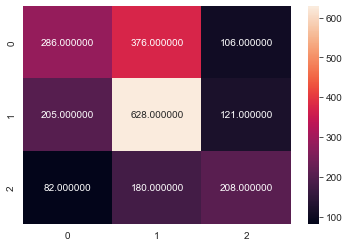

In [118]:
sns.heatmap(cm,annot=True,fmt='4f')